# **MLP**
* **Daniel García Fallas**
* **Elias Arce Mendez**
* **Romario Ramirez**

In [1]:
import os 
import numpy as np

In [2]:
base_dir = os.path.dirname(os.getcwd())
covid_images_path = base_dir+"/COVID-19_Radiography_Dataset/COVID/images"
normal_images_path = base_dir+"/COVID-19_Radiography_Dataset/Normal/images"
lung_opacity_images_path = base_dir+"/COVID-19_Radiography_Dataset/Lung_Opacity/images"
viral_pneumonia_images_path = base_dir+"/COVID-19_Radiography_Dataset/Viral Pneumonia/images"

(299, 299, 3)


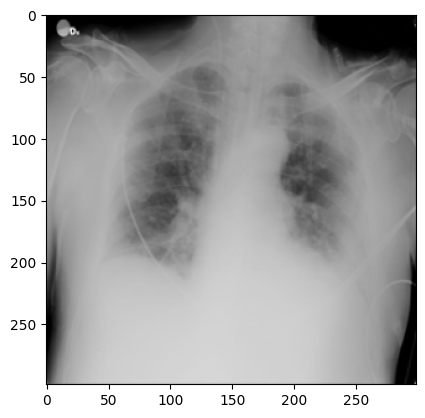

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(covid_images_path+"/COVID-1.png")
plt.imshow(img)
print(img.shape)

(241, 241, 3)


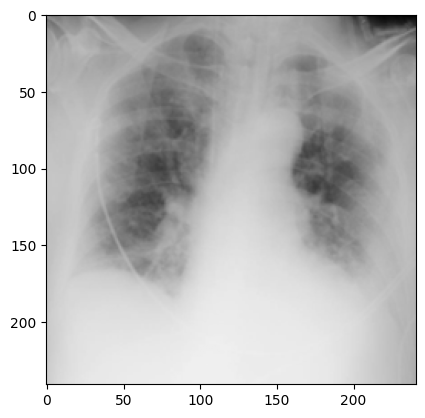

In [4]:


img = cv2.imread(covid_images_path+"/COVID-1.png")
img = img / 225.0
height, width, _ = img.shape
percentage_trim = 0.1
pixels_clipping = int(min(height, width) * percentage_trim)
img = img[pixels_clipping:height-pixels_clipping, pixels_clipping:width-pixels_clipping]

# if img.shape != (241, 241):
#             img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

# img_resized = cv2.resize(img,(120,120))
# plt.imshow(img_resized)
# print(img_resized.shape)

plt.imshow(img)
print(img.shape)

### Feature Engineering
* resize by removing 1% of the edges (241,241)
* normalization data/255.0


In [5]:
def loadImages(path, urls, target, size):
    images = []
    labels = []

    height, width = 299,299
    percentage_trim = 0.1

    pixels_clipping = int(min(height, width) * percentage_trim)
    
    # for i in range(len(urls))
    for i in range(size):
        img_path = path+"/"+urls[i]
        # normalization
        img = cv2.imread(img_path) / 255.0
        # Reducción de dimenionalidad
        img = img[pixels_clipping:height-pixels_clipping, pixels_clipping:width-pixels_clipping]
        
        # to rezise images
        # img = cv2.resize(img,(120,120))
        # if img.shape != (241, 241):
        #     img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
        images.append(img)
        labels.append(target)
    
    return np.asarray(images),labels

### Loading data

##### Target Labels
* 0 : normal
* 1 : covid
* 2 : lung opacity
* 3 : viral pneumonia

In [6]:
print(len((os.listdir(normal_images_path))))
print(len((os.listdir(covid_images_path))))
print(len((os.listdir(lung_opacity_images_path))))
print(len((os.listdir(viral_pneumonia_images_path))))

10192
3616
6012
1345


In [7]:
normalImages,normalTargets = loadImages(normal_images_path,os.listdir(normal_images_path),0,2000)
covidImages,covidTargets = loadImages(covid_images_path,os.listdir(covid_images_path),1,2000)
lungImages,lungTargets = loadImages(lung_opacity_images_path,os.listdir(lung_opacity_images_path),2,2000)
viralImages,viralTargets = loadImages(viral_pneumonia_images_path,os.listdir(viral_pneumonia_images_path),3,1345)

In [8]:
# print(normalImages.shape)
# print(covidImages.shape)
# print(lungImages.shape)
# print(viralImages.shape)

### Creating df

In [9]:
data_Set = np.r_[normalImages,covidImages,lungImages,viralImages]
targets = np.r_[normalTargets,covidTargets,lungTargets,viralTargets]

### Dividing the train and test data
##### We choose
* 20% testing
* 80% training

In [10]:
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam
data_Set = data_Set.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(data_Set, targets, test_size=0.2,stratify=targets)


In [11]:
y_train = to_categorical(y_train.astype(int),num_classes=4)
y_test = to_categorical(y_test.astype(int),num_classes=4)

# Architectures

## **Architecture 1**
![arquitectura1](arquitectura1.png)
## **Architecture 2**
![arquitectura2](arquitectura2.png)
## **Architecture 3**
![arquitectura3](arquitectura3.png)

### Creating a MLP model with keras

In [12]:
from keras import metrics
mlp = Sequential()
mlp.add(Flatten(input_shape = (241,241,3)))

mlp.add(Dense(64,activation="relu"))
mlp.add(Dropout(0.2))

mlp.add(Dense(32,activation="relu"))
mlp.add(Dropout(0.2))

mlp.add(Dense(4,activation="softmax"))

optimizer = Adam(learning_rate=0.01)
mlp.compile(loss="categorical_crossentropy",optimizer=optimizer,metrics=["accuracy", metrics.Precision(), metrics.Recall()])

mlp.fit(X_train,y_train,batch_size=64,epochs=10,verbose=1)


Epoch 1/10
92/92 [==============================] - 9s 67ms/step - loss: 26.1144 - accuracy: 0.2776 - precision: 0.3083 - recall: 0.0468
Epoch 2/10
92/92 [==============================] - 6s 66ms/step - loss: 1.3737 - accuracy: 0.2742 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/10
92/92 [==============================] - 6s 64ms/step - loss: 1.3747 - accuracy: 0.2714 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/10
92/92 [==============================] - 6s 67ms/step - loss: 1.3743 - accuracy: 0.2650 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/10
92/92 [==============================] - 6s 63ms/step - loss: 1.3743 - accuracy: 0.2646 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/10
92/92 [==============================] - 6s 63ms/step - loss: 1.3747 - accuracy: 0.2691 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/10
92/92 [==============================] - 6s 65ms/step - loss: 1.3743 - accuracy: 0.2723 - precision: 0.0000e+00 - recall: 0.0000e+00

# Model size

In [13]:
import sys

model_size = sys.getsizeof(mlp)
model_size_mb = model_size / (1024 * 1024)
print(f"Model Size: {model_size_mb} MB")

Model Size: 5.340576171875e-05 MB


In [14]:
# Evaluar el modelo en el conjunto de prueba
loss1, accuracy, precision_1, recall_1 = mlp.evaluate(X_test, y_test, verbose=0)
print(mlp.metrics_names)

print(f"Pérdida en el conjunto de prueba: {loss1}")
print(f"Accuracy en el conjunto de prueba: {accuracy}")
print(f"Precisión en el conjunto de prueba: {precision_1}")
print(f"Recall en el conjunto de prueba: {recall_1}")

['loss', 'accuracy', 'precision', 'recall']
Pérdida en el conjunto de prueba: 1.3736863136291504
Accuracy en el conjunto de prueba: 0.2722940742969513
Precisión en el conjunto de prueba: 0.0
Recall en el conjunto de prueba: 0.0


# Metrics without Feature Extractor

46/46 [==============================] - 2s 35ms/step


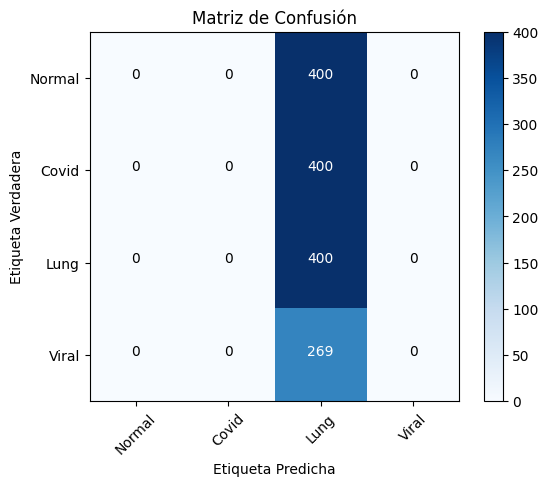

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Realizar predicciones con el modelo
y_pred = mlp.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test, axis=1)
# # Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

classes = ["Normal","Covid","Lung","Viral"]
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.show()

In [16]:
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred,average="micro")
recall1 = recall_score(y_test, y_pred,average="micro")
f1_1 = f1_score(y_test, y_pred,average="micro")

print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1-Score:", f1_1)

Accuracy: 0.27229407760381213
Precision: 0.27229407760381213
Recall: 0.27229407760381213
F1-Score: 0.27229407760381213


# MLP with Local-Binary-Patterns

In [17]:
##### Local Binary Patterns (LBP) Son útiles para la detección de texturas en imágenes. Puedes aplicar LBP en regiones específicas del pulmón para resaltar características texturales, como la presencia de nódulos, opacidades o patrones anómalos.
from skimage.feature import local_binary_pattern
def extract_lbp_features(images):
    features = []    
    for image in images:
        # Convierte la imagen a escala de grises        
        # # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Calcula los LBP        
        if image.shape != (241, 241):
            image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])
        lbp = local_binary_pattern(image, 8, 1, method='uniform')
        # Calcula el histograma de los LBP        
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 60))
        # Normaliza el histograma        
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-7)      
        features.append(hist)
    return np.array(features)
lbp_features = extract_lbp_features(data_Set)

c:\Users\Garza\Desktop\RP_Project2\venv\Lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


In [18]:

data_Set = data_Set.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(lbp_features, targets, test_size=0.2,stratify=targets)

In [19]:
y_train = to_categorical(y_train.astype(int),num_classes=4)
y_test = to_categorical(y_test.astype(int),num_classes=4)

In [20]:
mlp = Sequential()
mlp.add(Flatten(input_shape = (59,1)))

mlp.add(Dense(64,activation="relu"))
mlp.add(Dropout(0.2))

mlp.add(Dense(32,activation="relu"))
mlp.add(Dropout(0.2))

mlp.add(Dense(4,activation="softmax"))

optimizer = Adam(learning_rate=0.01)
mlp.compile(loss="categorical_crossentropy",optimizer=optimizer,metrics=["accuracy", metrics.Precision(), metrics.Recall()])

mlp.fit(X_train,y_train,batch_size=64,epochs=10,verbose=1)



Epoch 1/10
92/92 [==============================] - 1s 2ms/step - loss: 1.3165 - accuracy: 0.3606 - precision_1: 0.6305 - recall_1: 0.0218    
Epoch 2/10
92/92 [==============================] - 0s 1ms/step - loss: 1.2291 - accuracy: 0.4309 - precision_1: 0.5861 - recall_1: 0.1101
Epoch 3/10
92/92 [==============================] - 0s 1ms/step - loss: 1.2069 - accuracy: 0.4573 - precision_1: 0.5885 - recall_1: 0.1448
Epoch 4/10
92/92 [==============================] - 0s 2ms/step - loss: 1.1899 - accuracy: 0.4648 - precision_1: 0.6053 - recall_1: 0.1761
Epoch 5/10
92/92 [==============================] - 0s 1ms/step - loss: 1.1666 - accuracy: 0.4731 - precision_1: 0.6241 - recall_1: 0.2080
Epoch 6/10
92/92 [==============================] - 0s 1ms/step - loss: 1.1789 - accuracy: 0.4585 - precision_1: 0.6260 - recall_1: 0.1915
Epoch 7/10
92/92 [==============================] - 0s 2ms/step - loss: 1.1591 - accuracy: 0.4859 - precision_1: 0.6358 - recall_1: 0.2124
Epoch 8/10
92/92 [=====

# Model size

In [21]:
import sys

model_size = sys.getsizeof(mlp)
model_size_mb = model_size / (1024 * 1024)
print(f"Model Size: {model_size_mb} MB")

Model Size: 5.340576171875e-05 MB


In [22]:
loss2, accuracy, precision_1, recall_1 = mlp.evaluate(X_test, y_test, verbose=0)
print(mlp.metrics_names)

print(f"Pérdida en el conjunto de prueba: {loss2}")
print(f"Accuracy en el conjunto de prueba: {accuracy}")
print(f"Precisión en el conjunto de prueba: {precision_1}")
print(f"Recall en el conjunto de prueba: {recall_1}")

['loss', 'accuracy', 'precision_1', 'recall_1']
Pérdida en el conjunto de prueba: 1.1099692583084106
Accuracy en el conjunto de prueba: 0.5221238732337952
Precisión en el conjunto de prueba: 0.7594654560089111
Recall en el conjunto de prueba: 0.23213070631027222


# Metrics with filter

46/46 [==============================] - 0s 813us/step


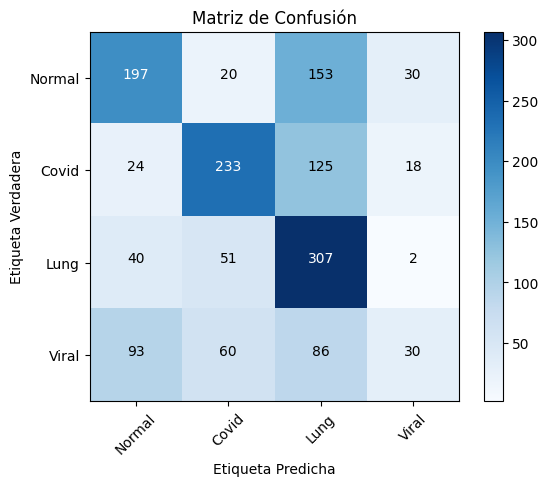

In [23]:
# Realizar predicciones con el modelo
y_pred = mlp.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test, axis=1)
# # Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

classes = ["Normal","Covid","Lung","Viral"]
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.show()

In [24]:
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred,average="micro")
recall2 = recall_score(y_test, y_pred,average="micro")
f1_2 = f1_score(y_test, y_pred,average="micro")

print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-Score:", f1_2)

Accuracy: 0.5221238938053098
Precision: 0.5221238938053098
Recall: 0.5221238938053098
F1-Score: 0.5221238938053098


# Tabla comparativa

In [25]:
import pandas as pd

data = {
    'Modelo': ['Modelo sin filtrado', 'Modelo con filtrado'],
    'Accuracy': [accuracy1, accuracy2],
    'Precision': [precision1, precision2],
    'Recall': [recall1, recall2],
    'F1-score': [f1_1, f1_2],
    'Loss': [loss1,loss2]
}

df = pd.DataFrame(data)
df.set_index('Modelo', inplace=True)

print(df)

                     Accuracy  Precision    Recall  F1-score      Loss
Modelo                                                                
Modelo sin filtrado  0.272294   0.272294  0.272294  0.272294  1.373686
Modelo con filtrado  0.522124   0.522124  0.522124  0.522124  1.109969
